In [40]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [41]:
rootdir = '/projects/SOCCOM/'
colors = {}
ds = {}

In [42]:
basin_name = 'global'
targets = ['jra55','era5','merra2','ecco']
for target in targets:
    if target=='jra55':
        color = 'tab:blue'
        salinity = 'en4'
    elif target=='era5':
        color='tab:orange'
        salinity = 'en4'
    elif target=='merra2':
        color='tab:green'
        salinity = 'en4'
    elif target=='ecco':
        color='tab:red'
        salinity = 'ecco'
    rootdir_ds=rootdir+'/graemem/wmt/'+target+'/'
    path = rootdir_ds+target+'.'+salinity+'.G-sigma0-'+basin_name+'.nc'
    ds[target] = xr.open_dataset(path)
    ds[target]['total']=ds[target]['heat']+ds[target]['salt']
    colors[target]=color

In [43]:
rootdir_cm4 = rootdir+'/graemem/wmt/cm4_fromJET/'
resolutions = ['p25','p125']
cm4 = {}
for resolution in resolutions:
    if resolution == 'p25':
        timestr = '0001to0200'
        colors[resolution]='gray'
    elif resolution == 'p125':
        timestr = '0001to0240'
        colors[resolution]='black'
    filename = 'CM4_piControl_c192_OM4'+resolution+'_v7_global_'+timestr+'_swmt_decomposed_sigma0_010.nc'
    ds[resolution]= xr.open_dataset(rootdir_cm4+filename,use_cftime=True).sel(time=slice('0140-01-01','0199-12-31'))

/home/graemem/.conda/envs/core/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/graemem/.conda/envs/core/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/graemem/.conda/envs/core/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


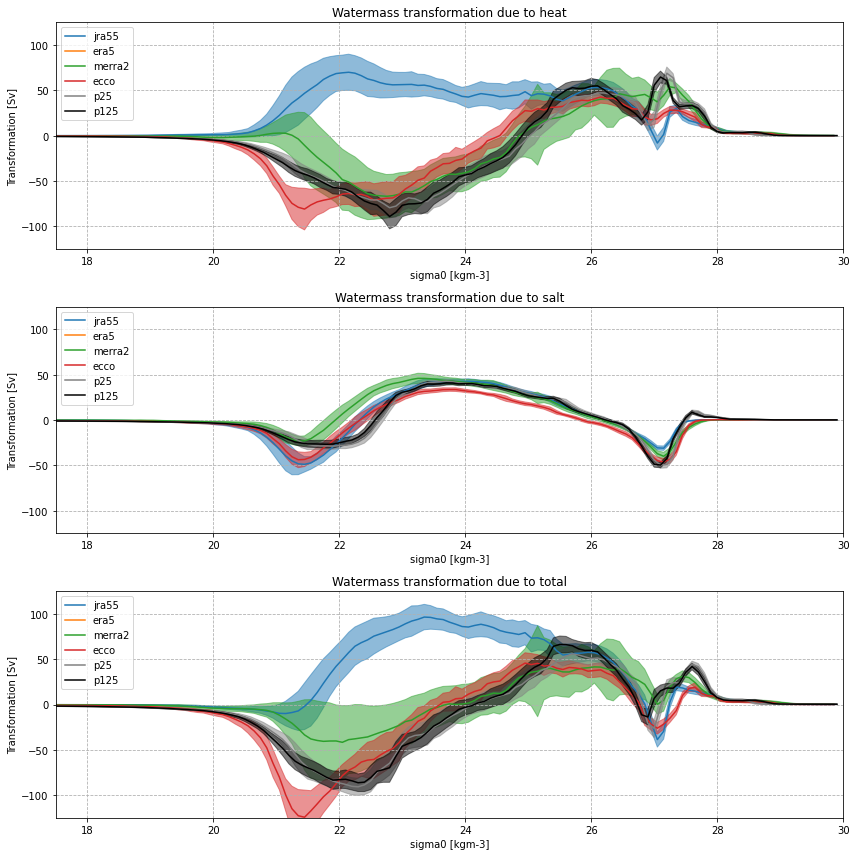

In [44]:
xlims=[17.5,30]
terms = ['heat','salt','total']
fig,ax=plt.subplots(figsize=(12,4*len(terms)),nrows=len(terms))
for i,term in enumerate(terms):
    axnow = ax[i]
    for key,item in ds.items():
        x = item['sigma0']
        mean = item[term].mean('time')*1e-6
        # Get std of annual mean
        std = item[term].coarsen(time=12,boundary="pad").mean().std('time')*1e-6
        color = colors[key]
        axnow.plot(x,mean,color=color,label=key)
        axnow.fill_between(x,mean-std,mean+std,color=color,alpha=0.5)
    axnow.legend(loc="upper left")
    axnow.set_title('Watermass transformation due to '+term)
    axnow.set_xlabel('sigma0 [kgm-3]')
    axnow.set_ylabel('Transformation [Sv]')
    axnow.autoscale(axis='x',tight=True)
    if i==0:
        maxval = np.max(np.abs(axnow.get_ylim()))    
    axnow.set_ylim([-maxval-maxval/10,maxval+maxval/10])
    axnow.grid(linestyle='--')
    axnow.set_xlim(xlims)
fig.tight_layout()
fig.savefig('../figures/cf_wmt_include-cm4.'+"-".join(targets)+'.'+basin_name+'.png',transparent=True,dpi=180)